Q1) How can farming practices be optimised while promoting sustainability and reducing environmental impact?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


In [2]:
farmer_df = pd.read_csv('./data/farmer_advisor_dataset.csv')
market_df = pd.read_csv('./data/market_researcher_dataset.csv')

In [3]:
farmer_df.head()

,Farm_ID,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Crop_Type,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
0,1,7.073643,49.145359,26.668157,227.890912,Wheat,131.692844,2.958215,1.576920,51.913649
1,2,6.236931,21.496115,29.325342,244.017493,Soybean,136.370492,19.204770,3.824686,47.159077
2,3,5.922335,19.469042,17.666414,141.110521,Corn,99.725210,11.041066,1.133198,50.148418
3,4,6.845120,27.974234,17.188722,156.785663,Wheat,194.832396,8.806271,8.870540,89.764557
4,5,6.934171,33.637679,23.603899,77.859362,Corn,57.271267,3.747553,8.779317,51.033941


Analysis by Crop Type

In [4]:
farmer_df['Crop_Type'].unique()

array(['Wheat', 'Soybean', 'Corn', 'Rice'], dtype=object)

In [5]:
farmer_df.groupby(['Crop_Type']).size()

Crop_Type
Corn       2455
Rice       2464
Soybean    2559
Wheat      2522
dtype: int64

In [6]:
corn_df = farmer_df[farmer_df['Crop_Type'] == 'Corn'].reset_index(drop=True).drop(columns=['Crop_Type'])
rice_df = farmer_df[farmer_df['Crop_Type'] == 'Rice'].reset_index(drop=True).drop(columns=['Crop_Type'])
soybean_df = farmer_df[farmer_df['Crop_Type'] == 'Soybean'].reset_index(drop=True).drop(columns=['Crop_Type'])
wheat_df = farmer_df[farmer_df['Crop_Type'] == 'Wheat'].reset_index(drop=True).drop(columns=['Crop_Type'])

crop_names = ['Corn','Rice','Soybean','Wheat']
crop_dfs = [corn_df,rice_df,soybean_df,wheat_df]

Is there a discernable Crop_Yield_ton or Sustainability_Score across the crops?

In [7]:
for crop_name, crop_df in zip(crop_names, crop_dfs):

    print(F"Average Crop_Yield_ton in {crop_name}: {crop_df.loc[:,'Crop_Yield_ton'].mean()}")

Average Crop_Yield_ton in Corn: 5.532547700050306
Average Crop_Yield_ton in Rice: 5.530343855231179
Average Crop_Yield_ton in Soybean: 5.4693304241317415
Average Crop_Yield_ton in Wheat: 5.42868697874103


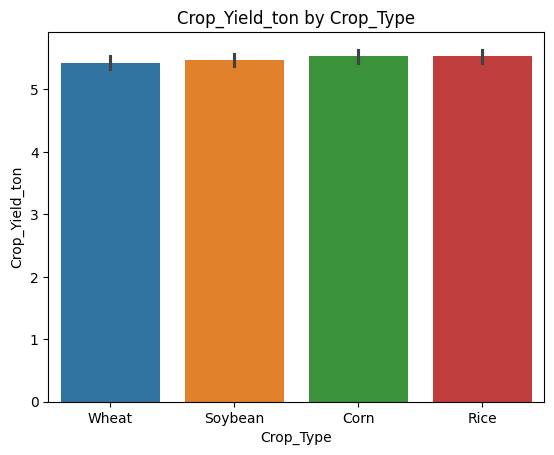

In [8]:
sns.barplot(farmer_df,y = 'Crop_Yield_ton', x='Crop_Type', hue = 'Crop_Type')
plt.title(F"Crop_Yield_ton by Crop_Type")
plt.show()

Wheat seems to have a smaller Crop_Yield_ton but don't think it is significant

In [9]:
for crop_name, crop_df in zip(crop_names, crop_dfs):
    print(F"Average Sustainability_Score in {crop_name}: {crop_df.loc[:,'Sustainability_Score'].mean()}")

Average Sustainability_Score in Corn: 50.336716110938774
Average Sustainability_Score in Rice: 50.12116381792024
Average Sustainability_Score in Soybean: 50.020930720912034
Average Sustainability_Score in Wheat: 50.37797660327763


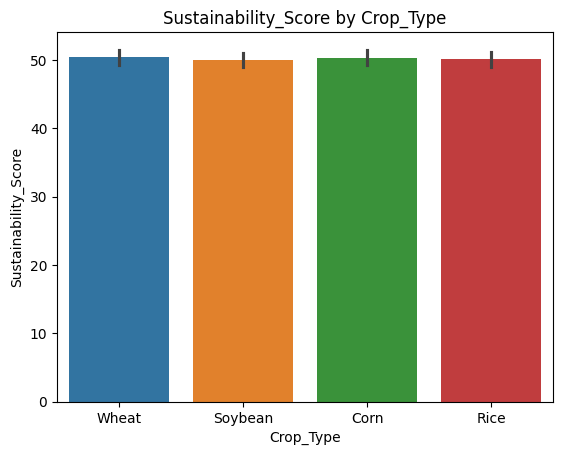

In [10]:
sns.barplot(farmer_df,y = 'Sustainability_Score', x='Crop_Type', hue = 'Crop_Type')
plt.title(F"Sustainability_Score by Crop_Type")
plt.show()

Soybean seems to have lower Sustainability_Score but not sure it is significant

Testing for statistical significance

In [11]:
Crop_Yield_ton_ANOVA = f_oneway(corn_df['Crop_Yield_ton'], rice_df['Crop_Yield_ton'], soybean_df['Crop_Yield_ton'], wheat_df['Crop_Yield_ton'])

In [12]:
print(F"Crop is not statistically significant as p value of the test is: {Crop_Yield_ton_ANOVA.pvalue} >> 0.0.5 in determining Crop_Yield_ton")

Crop is not statistically significant as p value of the test is: 0.4242485393761416 >> 0.0.5 in determining Crop_Yield_ton


In [13]:
Sustainability_Score_ANOVA = f_oneway(corn_df['Sustainability_Score'], rice_df['Sustainability_Score'], soybean_df['Sustainability_Score'], wheat_df['Sustainability_Score'])

In [14]:
print(F"Crop is not statistically significant as p value of the test is: {Sustainability_Score_ANOVA.pvalue} >> 0.0.5 in determining Sustainability_Score")

Crop is not statistically significant as p value of the test is: 0.9656869114798704 >> 0.0.5 in determining Sustainability_Score


Distribution of Sustainability_Score by Crop_Type

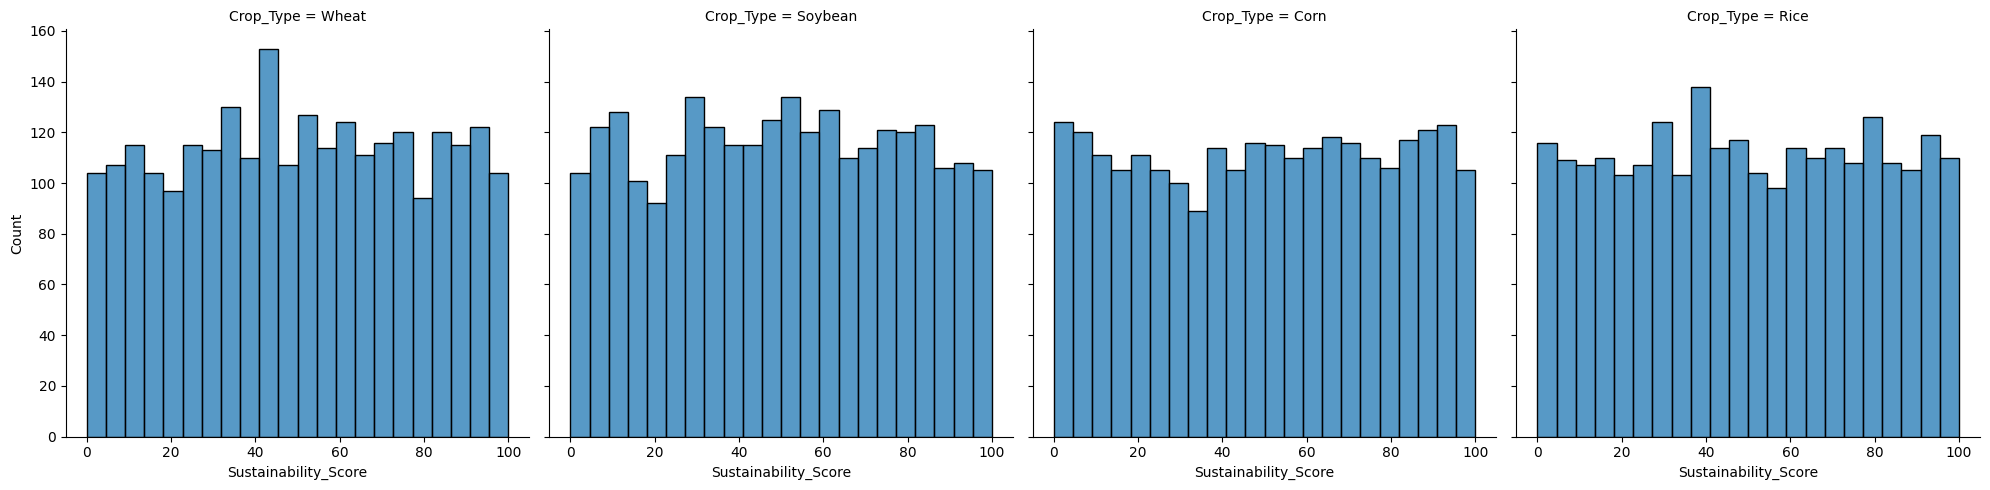

In [15]:
sns.displot(farmer_df, x="Sustainability_Score", col="Crop_Type")

In [16]:
numeric_columns = farmer_df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('Farm_ID')

In [17]:
for crop_name, crop_df in zip(crop_names, crop_dfs):
    corr_matrix = crop_df[numeric_columns].corr()
    print(F"{crop_name}")
    print(corr_matrix['Sustainability_Score'],'\n')

Corn
Soil_pH                -0.003565
Soil_Moisture          -0.012612
Temperature_C           0.037847
Rainfall_mm             0.044281
Fertilizer_Usage_kg     0.030363
Pesticide_Usage_kg     -0.004693
Crop_Yield_ton         -0.017115
Sustainability_Score    1.000000
Name: Sustainability_Score, dtype: float64 

Rice
Soil_pH                 0.027624
Soil_Moisture           0.014456
Temperature_C           0.033386
Rainfall_mm            -0.004479
Fertilizer_Usage_kg    -0.003369
Pesticide_Usage_kg     -0.025362
Crop_Yield_ton          0.015550
Sustainability_Score    1.000000
Name: Sustainability_Score, dtype: float64 

Soybean
Soil_pH                 0.031849
Soil_Moisture           0.009250
Temperature_C           0.022513
Rainfall_mm            -0.007081
Fertilizer_Usage_kg    -0.003872
Pesticide_Usage_kg     -0.017536
Crop_Yield_ton         -0.010043
Sustainability_Score    1.000000
Name: Sustainability_Score, dtype: float64 

Wheat
Soil_pH                 0.011882
Soil_Moisture   

Suprisingly Pesticide_Usage_kga and Fertilizer_Usage_kg did not negatively affect the Sustainability_Score 

In [18]:
for crop_name, crop_df in zip(crop_names, crop_dfs):
    print(crop_name)
    print(crop_df['Sustainability_Score'].describe())
    print('\n')

Corn
count    2455.000000
mean       50.336716
std        29.216601
min         0.003672
25%        24.410464
50%        50.861552
75%        75.581911
max        99.982898
Name: Sustainability_Score, dtype: float64


Rice
count    2464.000000
mean       50.121164
std        28.790213
min         0.094223
25%        25.724595
50%        49.371945
75%        75.327497
max        99.924290
Name: Sustainability_Score, dtype: float64


Soybean
count    2559.000000
mean       50.020931
std        28.372919
min         0.032184
25%        26.595059
50%        50.343204
75%        74.310586
max        99.994545
Name: Sustainability_Score, dtype: float64


Wheat
count    2522.000000
mean       50.377977
std        28.317076
min         0.048762
25%        26.903133
50%        50.164720
75%        74.579588
max        99.861752
Name: Sustainability_Score, dtype: float64




In [19]:
for crop_name, crop_df in zip(crop_names, crop_dfs):
    print(crop_name)
    print(crop_df['Crop_Yield_ton'].describe())
    print('\n')

Corn
count    2455.000000
mean        5.532548
std         2.646985
min         1.001584
25%         3.244264
50%         5.560555
75%         7.908945
max         9.998172
Name: Crop_Yield_ton, dtype: float64


Rice
count    2464.000000
mean        5.530344
std         2.589223
min         1.004837
25%         3.261746
50%         5.520343
75%         7.789679
max         9.999638
Name: Crop_Yield_ton, dtype: float64


Soybean
count    2559.000000
mean        5.469330
std         2.594747
min         1.001689
25%         3.254244
50%         5.478837
75%         7.699708
max         9.999082
Name: Crop_Yield_ton, dtype: float64


Wheat
count    2522.000000
mean        5.428687
std         2.604770
min         1.000323
25%         3.080633
50%         5.438815
75%         7.617838
max         9.999446
Name: Crop_Yield_ton, dtype: float64




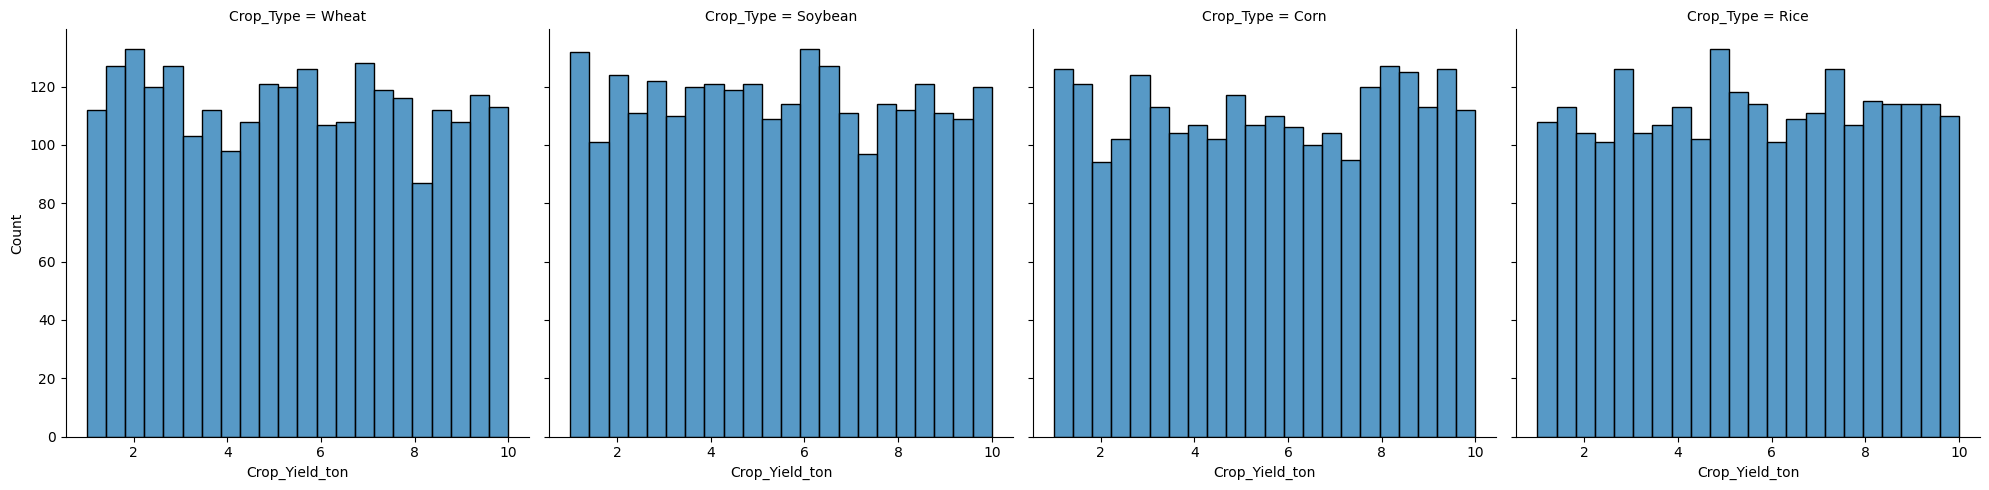

In [20]:

sns.displot(farmer_df, x="Crop_Yield_ton", col="Crop_Type")
plt.show()

Wheat has a lower 25% and average Crop_Yield_ton

In [21]:
farmer_df

,Farm_ID,Soil_pH,Soil_Moisture,Temperature_C,Rainfall_mm,Crop_Type,Fertilizer_Usage_kg,Pesticide_Usage_kg,Crop_Yield_ton,Sustainability_Score
0,1,7.073643,49.145359,26.668157,227.890912,Wheat,131.692844,2.958215,1.576920,51.913649
1,2,6.236931,21.496115,29.325342,244.017493,Soybean,136.370492,19.204770,3.824686,47.159077
2,3,5.922335,19.469042,17.666414,141.110521,Corn,99.725210,11.041066,1.133198,50.148418
3,4,6.845120,27.974234,17.188722,156.785663,Wheat,194.832396,8.806271,8.870540,89.764557
4,5,6.934171,33.637679,23.603899,77.859362,Corn,57.271267,3.747553,8.779317,51.033941
...,...,...,...,...,...,...,...,...,...,...
9995,9996,6.637573,15.723781,32.330501,267.024180,Rice,89.202027,13.514577,6.118399,8.578651
9996,9997,6.251629,12.161680,23.324274,133.896098,Rice,92.675510,3.257280,9.791433,96.561580
9997,9998,7.038902,10.163089,23.400036,133.704986,Rice,104.183016,14.903259,3.623067,51.658196
9998,9999,5.647329,28.633415,31.122309,102.169135,Rice,58.636950,12.418353,6.605352,16.538088


In [22]:
for crop_name, crop_df in zip(crop_names, crop_dfs):
    print(crop_name)
    print(crop_df['Soil_pH'].describe())
    print('\n')

Corn
count    2455.000000
mean        6.513959
std         0.581548
min         5.500866
25%         6.018106
50%         6.505143
75%         7.015635
max         7.499159
Name: Soil_pH, dtype: float64


Rice
count    2464.000000
mean        6.489261
std         0.575234
min         5.500021
25%         5.994641
50%         6.476422
75%         6.992645
max         7.499610
Name: Soil_pH, dtype: float64


Soybean
count    2559.000000
mean        6.512909
std         0.565088
min         5.500887
25%         6.025164
50%         6.524141
75%         6.991671
max         7.499761
Name: Soil_pH, dtype: float64


Wheat
count    2522.000000
mean        6.481798
std         0.574730
min         5.501193
25%         5.975861
50%         6.470961
75%         6.970276
max         7.499762
Name: Soil_pH, dtype: float64




In [44]:
for crop_name, crop_df in zip(crop_names, crop_dfs):
    print(crop_name)
    print(crop_df['Soil_Moisture'].describe())
    print('\n')

Corn
count    2455.000000
mean       30.477318
std        11.423602
min        10.014188
25%        21.034190
50%        30.480965
75%        40.314701
max        49.994713
Name: Soil_Moisture, dtype: float64


Rice
count    2464.000000
mean       29.369335
std        11.505601
min        10.004217
25%        19.468970
50%        28.560669
75%        39.156733
max        49.994036
Name: Soil_Moisture, dtype: float64


Soybean
count    2559.000000
mean       30.135458
std        11.541295
min        10.008659
25%        19.979161
50%        30.291508
75%        40.438888
max        49.986110
Name: Soil_Moisture, dtype: float64


Wheat
count    2522.000000
mean       29.969094
std        11.479851
min        10.002907
25%        19.942897
50%        29.966559
75%        40.095282
max        49.980437
Name: Soil_Moisture, dtype: float64




In [45]:
for crop_name, crop_df in zip(crop_names, crop_dfs):
    print(crop_name)
    print(crop_df['Temperature_C'].describe())
    print('\n')

Corn
count    2455.000000
mean       24.903524
std         5.756393
min        15.010295
25%        20.057182
50%        24.661926
75%        30.064930
max        34.997170
Name: Temperature_C, dtype: float64


Rice
count    2464.000000
mean       25.011235
std         5.763930
min        15.005513
25%        20.121899
50%        25.054401
75%        30.013077
max        34.986646
Name: Temperature_C, dtype: float64


Soybean
count    2559.000000
mean       25.089444
std         5.775830
min        15.001917
25%        20.066839
50%        25.143692
75%        30.038981
max        34.997529
Name: Temperature_C, dtype: float64


Wheat
count    2522.000000
mean       25.101123
std         5.782583
min        15.000186
25%        20.040559
50%        25.058607
75%        30.151793
max        34.999673
Name: Temperature_C, dtype: float64




In [46]:
for crop_name, crop_df in zip(crop_names, crop_dfs):
    print(crop_name)
    print(crop_df['Rainfall_mm'].describe())
    print('\n')

Corn
count    2455.000000
mean      174.712080
std        72.459677
min        50.076617
25%       112.725430
50%       172.635587
75%       237.851483
max       299.986192
Name: Rainfall_mm, dtype: float64


Rice
count    2464.000000
mean      175.338412
std        73.158799
min        50.031967
25%       109.235307
50%       175.190591
75%       240.246247
max       299.971369
Name: Rainfall_mm, dtype: float64


Soybean
count    2559.000000
mean      175.520537
std        72.489456
min        50.032798
25%       114.342092
50%       176.300552
75%       236.933480
max       299.862133
Name: Rainfall_mm, dtype: float64


Wheat
count    2522.000000
mean      174.301938
std        73.370073
min        50.076113
25%       110.875276
50%       173.520068
75%       236.291112
max       299.983419
Name: Rainfall_mm, dtype: float64




Grow crops with the same env needs in same location, soil PH, Soil_Moisture, Temperature_C, Rainfall_mm